#### objective ----- Problem 1: Status of COVID-19 in Various Countries From the Covid-19 data, plot the number of deaths with respect to the dates for 2 countries other than India (eg. US, Italy, China). Use polynomial regression to predict the number of deaths in the last 1 day for these countries and India. Check the performance of the models in terms of R2-error. 

##### Made By Divyanshu Parihar

# Importing all the lib we will need

In [242]:
#<-------------------These Imports are releated to DataScience Work ------------------------------------------>
import pandas as pd #importing Pandas DataAnalysis Library
import matplotlib.pyplot as plt #importing matplotlib for graphical visualization 
import numpy as np #importing numpy for manipulating
#<-----------------------These imports are for machine learning  algorithms ---------------------------------->
from sklearn.preprocessing import PolynomialFeatures #To work with polynomial combinations
from sklearn.linear_model import LinearRegression# This is our Core MachineLearning Algorithm

# Fetching DataSet

In [243]:
#Getting The DataSet
dataset=pd.read_csv(r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')

# Framming DataSet Data for Spain and Italy only

In [244]:
#<--------------------------------Getting data for specific countries ------------------------------------------>
df_spain=dataset[dataset['Country']=="Spain"].reset_index(drop=True)# df_spain contains the dataframe where the country is spain
df_italy=dataset[dataset['Country']=="Italy"].reset_index(drop=True)# df_italy contains the dataframe where the country is italy

# Spain 

In [245]:
#<----------------------------modifying data to remove cases where confirmed cases are 0.------------------>
no_case_spain=df_spain['Confirmed']==0 # condition for next line
df_spain=df_spain[~no_case_spain].reset_index(drop=True)#this will drop all the where the above condition is True
dates=df_spain['Date'].values # it will fetch all the actual values NOT THE dataframe
x_values = np.arange(0,len(dates))# with the help of numpy.arrange function we will generate an array[0,1,2,------,145]
print(df_spain.tail())# it just prints last 5 elements for the df_spain


           Date Country  Confirmed  Recovered  Deaths
141  2020-06-21   Spain     246272     150376   28323
142  2020-06-22   Spain     246504     150376   28324
143  2020-06-23   Spain     246752     150376   28325
144  2020-06-24   Spain     247086     150376   28327
145  2020-06-25   Spain     247486     150376   28330


#####                                                      Preprocessing

In [246]:
#<----------------------------Preprocessing the data------------------>
poly=PolynomialFeatures(degree=6)# this will instantiate a 5 degree plynomial transformer(poly)
X_poly=poly.fit_transform(x_values.reshape((-1,1))) # using our transformer to to make to make 1d array of polymers of x_valuesto reduce the gap 
#between thecomponents for single thing

#####                                                     Creating Variables

In [247]:
y=df_spain['Deaths'].values# Fetching the Values for the Deaths.
X_train = X_poly[:-1,:]# contains all values except last
y_train = y[:-1]# contains all values except last
X_test = X_poly[-1:,:]# contains the last value
y_test = y[-1:]# contains the last value

#####                                                      Applying linear regression Algorithm

In [248]:
span_nlr=LinearRegression()# initializing linearRegression
span_nlr.fit(X_train,y_train)# training the model with the train data defined above.

LinearRegression()

###                                                 Checking R**2 value(accuracy)

In [249]:
print(span_nlr.score(X_poly,y))# we have found the accouracy. it also depends on degree of Preprocessing

0.9957677902174804


#####                                                      Predicting values

In [250]:
Y_pred=span_nlr.predict(X_test)
print(Y_pred)

[29185.52598846]


#####                                                      Showing Results (spain)

In [251]:
Y_pred=span_nlr.predict(X_test)
print('Accuracy :',100*np.abs(span_nlr.score(X_poly,y)),"%")
print('Actual:',y_test)
print('Predicted:',Y_pred)
print('%error: ',100*abs(Y_pred-y_test)/y_test)

Accuracy : 99.57677902174804 %
Actual: [28330]
Predicted: [29185.52598846]
%error:  [3.01985877]


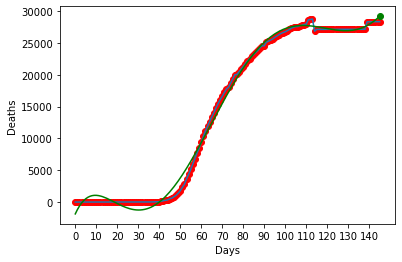

In [252]:
#<----------------------------------Ploting Actual Graphical Representation-------------------------------->
plt.scatter(x_values,y,color='red')
plt.plot(x_values,y)
plt.plot(x_values, span_nlr.predict(X_poly), color = "green")
plt.scatter(X_test[:,1],Y_pred,color='green')
plt.xticks(x_values[0 : : 10])
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()

# Italy

In [253]:
#<----------------------------modifying data to remove cases where confirmed cases are 0.------------------>
no_case_italy=df_italy['Confirmed']==0 # condition for next line
df_spain=df_italy[~no_case_italy].reset_index(drop=True)#this will drop all the where the above condition is True
dates=df_italy['Date'].values # it will fetch all the actual values NOT THE dataframe
x_values_italy = np.arange(0,len(dates))# with the help of numpy.arrange function we will generate an array[0,1,2,------,145]
print(df_italy.tail())# it just prints last 5 elements for the df_spain


           Date Country  Confirmed  Recovered  Deaths
151  2020-06-21   Italy     238499     182893   34634
152  2020-06-22   Italy     238720     183426   34657
153  2020-06-23   Italy     238833     184585   34675
154  2020-06-24   Italy     239410     186111   34644
155  2020-06-25   Italy     239706     186725   34678


#####                                                      Preprocessing

In [254]:
#<----------------------------Preprocessing the data------------------>
poly_italy=PolynomialFeatures(degree=5)# this will instantiate a 5 degree plynomial transformer(poly)
X_poly_italy=poly_italy.fit_transform(x_values_italy.reshape((-1,1))) # using our transformer to to make to make 1d array of polymers of x_valuesto reduce the gap 
#between thecomponents for single thing

#####                                                     Creating Variables

In [255]:
y_italy=df_italy['Deaths'].values# Fetching the Values for the Deaths.
X_train_italy = X_poly_italy[:-1,:]# contains all values except last
y_train_italy = y_italy[:-1]# contains all values except last
X_test_italy = X_poly_italy[-1:,:]# contains the last value
y_test_italy = y_italy[-1:]# contains the last value

#####                                                      Applying linear regression Algorithm

In [256]:
italy_nlr=LinearRegression()# initializing linearRegression
italy_nlr.fit(X_train_italy,y_train_italy)# training the model with the train data defined above.

LinearRegression()

###                                                 Checking R**2 value(accuracy)

In [257]:
italy_nlr.score(X_poly_italy,y_italy)# we have found the accouracy. it also depends on degree of Preprocessing

0.9964205290093119

#####                                                      Predicting values

In [258]:
Y_pred_italy=italy_nlr.predict(X_test_italy)
print(Y_pred_italy)# predicted value

[37213.01092299]


##### Showing Results (italy) 

In [259]:

print('Accuracy :',100*np.abs(italy_nlr.score(X_poly_italy,y_italy)),"%")
print('Actual:',y_test_italy)
print('Predicted:',Y_pred_italy)
print('%error: ',100*abs(Y_pred_italy-y_test_italy)/y_test_italy)

Accuracy : 99.64205290093119 %
Actual: [34678]
Predicted: [37213.01092299]
%error:  [7.31014165]


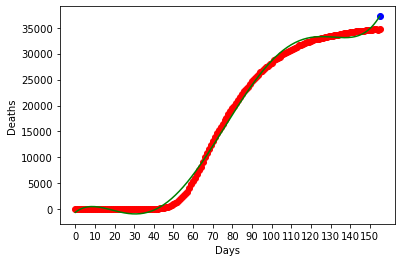

In [260]:
#<----------------------------------Ploting Actual Graphical Representation-------------------------------->
plt.scatter(x_values_italy,y_italy,color='red')
plt.plot(x_values_italy, italy_nlr.predict(X_poly_italy), color = "green")
plt.scatter(X_test_italy[:,1],Y_pred_italy,color='blue')
plt.xticks(x_values_italy[0 : : 10])
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.show()

# Extra --- Graph between  Between Spain and Italy (real Data)

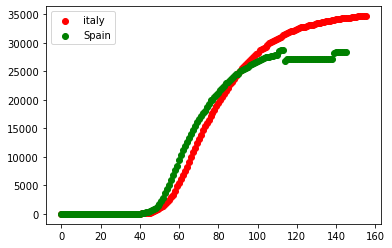

In [261]:
plt.scatter(x_values_italy,y_italy,color='red')
plt.scatter(x_values,y,color='Green')
plt.legend(("italy",'Spain'))
plt.show()